In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
#open csv file
df = pd.read_csv('crop_yield.csv')
df.head()

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,West,Sandy,Cotton,897.077239,27.676966,False,True,Cloudy,122,6.555816
1,South,Clay,Rice,992.673282,18.026142,True,True,Rainy,140,8.527341
2,North,Loam,Barley,147.998025,29.794042,False,False,Sunny,106,1.127443
3,North,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146,6.517573
4,South,Silt,Wheat,730.379174,31.620687,True,True,Cloudy,110,7.248251


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 987783 entries, 0 to 987782
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Region                  987783 non-null  object 
 1   Soil_Type               987783 non-null  object 
 2   Crop                    987783 non-null  object 
 3   Rainfall_mm             987783 non-null  float64
 4   Temperature_Celsius     987783 non-null  float64
 5   Fertilizer_Used         987783 non-null  bool   
 6   Irrigation_Used         987783 non-null  bool   
 7   Weather_Condition       987783 non-null  object 
 8   Days_to_Harvest         987783 non-null  int64  
 9   Yield_tons_per_hectare  987783 non-null  float64
dtypes: bool(2), float64(3), int64(1), object(4)
memory usage: 62.2+ MB


In [5]:
df.describe()

,Rainfall_mm,Temperature_Celsius,Days_to_Harvest,Yield_tons_per_hectare
count,987783.000000,987783.000000,987783.000000,987783.000000
mean,549.956072,27.504788,104.494294,4.649432
std,259.845266,7.221040,25.950476,1.696538
min,100.000896,15.000034,60.000000,-1.147613
25%,324.863997,21.254206,82.000000,3.417345
50%,550.111498,27.506872,104.000000,4.651866
75%,774.692615,33.753529,127.000000,5.879413
max,999.998098,39.999997,149.000000,9.963372


In [6]:
#count null values
df.isnull().sum()


Region                    0
Soil_Type                 0
Crop                      0
Rainfall_mm               0
Temperature_Celsius       0
Fertilizer_Used           0
Irrigation_Used           0
Weather_Condition         0
Days_to_Harvest           0
Yield_tons_per_hectare    0
dtype: int64

In [7]:
df.describe()

,Rainfall_mm,Temperature_Celsius,Days_to_Harvest,Yield_tons_per_hectare
count,987783.000000,987783.000000,987783.000000,987783.000000
mean,549.956072,27.504788,104.494294,4.649432
std,259.845266,7.221040,25.950476,1.696538
min,100.000896,15.000034,60.000000,-1.147613
25%,324.863997,21.254206,82.000000,3.417345
50%,550.111498,27.506872,104.000000,4.651866
75%,774.692615,33.753529,127.000000,5.879413
max,999.998098,39.999997,149.000000,9.963372


In [8]:
# Convert boolean columns to integers
df['Fertilizer_Used'] = df['Fertilizer_Used'].astype(int)
df['Irrigation_Used'] = df['Irrigation_Used'].astype(int)

# One-hot encode categorical columns
df = pd.get_dummies(df, columns=['Region', 'Soil_Type', 'Crop', 'Weather_Condition'], drop_first=True)


In [9]:
#scale numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Rainfall_mm', 'Temperature_Celsius', 'Days_to_Harvest']] = scaler.fit_transform(df[['Rainfall_mm', 'Temperature_Celsius', 'Days_to_Harvest']])


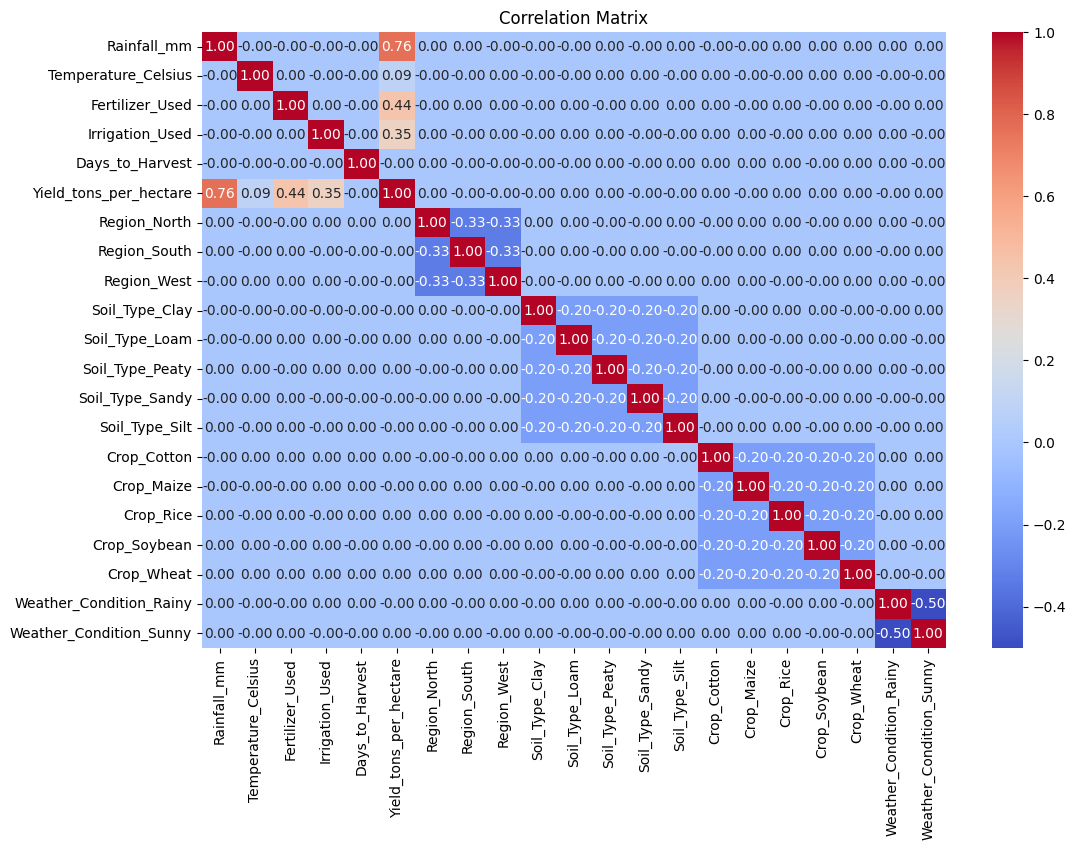

In [10]:
#correlational matrix
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()  


In [16]:
#check for multicollinearity
%pip install statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df[['Rainfall_mm', 'Temperature_Celsius', 'Days_to_Harvest', 'Yield_tons_per_hectare']]
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]     
print(vif)   

Note: you may need to restart the kernel to use updated packages.
                 Features       VIF
0             Rainfall_mm  1.073843
1     Temperature_Celsius  1.000926
2         Days_to_Harvest  1.000008
3  Yield_tons_per_hectare  1.074758


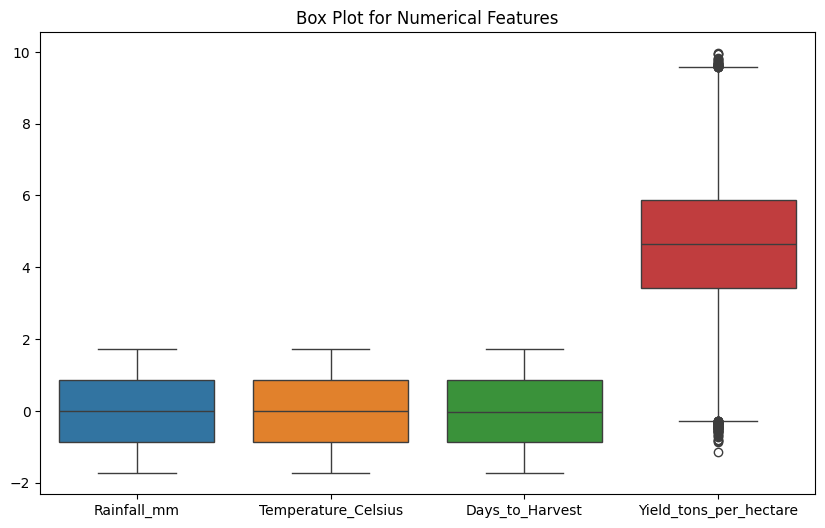

In [11]:
#box plot to identify outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Rainfall_mm', 'Temperature_Celsius', 'Days_to_Harvest', 'Yield_tons_per_hectare']])
plt.title('Box Plot for Numerical Features')
plt.show()

In [12]:
#handle outliers if any (for simplicity, we'll just clip them here)
for col in ['Rainfall_mm', 'Temperature_Celsius', 'Days_to_Harvest']:
    lower_bound = df[col].quantile(0.01)
    upper_bound = df[col].quantile(0.99)
    df[col] = df[col].clip(lower_bound, upper_bound)   
    print(f'Clipped {col} to range [{lower_bound}, {upper_bound}]') 
     

Clipped Rainfall_mm to range [-1.697292896598199, 1.6967898074649845]
Clipped Temperature_Celsius to range [-1.6965729447715587, 1.696239086298031]
Clipped Days_to_Harvest to range [-1.71458574495326, 1.7150255222952457]


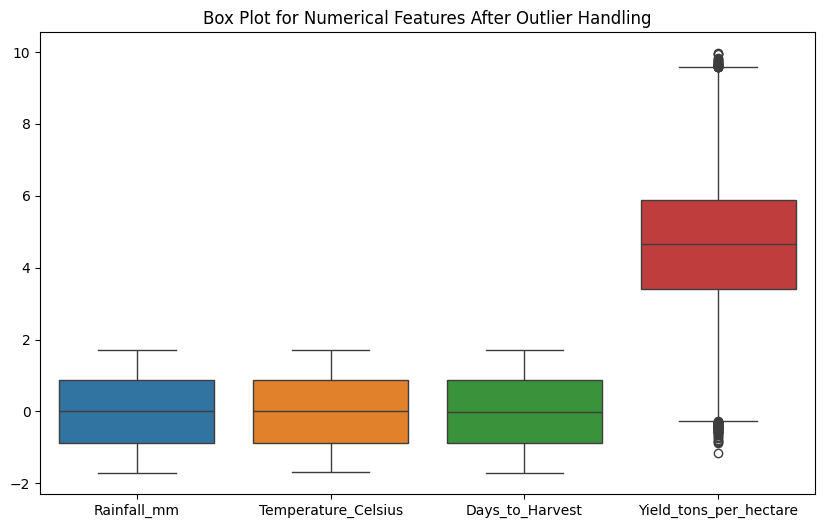

In [26]:
#box plot after handling outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Rainfall_mm', 'Temperature_Celsius', 'Days_to_Harvest', 'Yield_tons_per_hectare',]])
plt.title('Box Plot for Numerical Features After Outlier Handling')
plt.show()

In [27]:
#columns
df.columns

Index(['Rainfall_mm', 'Temperature_Celsius', 'Fertilizer_Used',
       'Irrigation_Used', 'Days_to_Harvest', 'Yield_tons_per_hectare',
       'Region_North', 'Region_South', 'Region_West', 'Soil_Type_Clay',
       'Soil_Type_Loam', 'Soil_Type_Peaty', 'Soil_Type_Sandy',
       'Soil_Type_Silt', 'Crop_Cotton', 'Crop_Maize', 'Crop_Rice',
       'Crop_Soybean', 'Crop_Wheat', 'Weather_Condition_Rainy',
       'Weather_Condition_Sunny'],
      dtype='object')

In [19]:
# Split data into features and target
X = df.drop('Yield_tons_per_hectare', axis=1)
y = df['Yield_tons_per_hectare']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)   

In [20]:
# Train a regression model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [21]:
#model parameters
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_) 

Model Coefficients: [ 1.29944680e+00  1.43888098e-01  1.50023209e+00  1.19998606e+00
  6.68744324e-04  4.97805413e-04 -1.03509614e-03 -1.05875069e-03
  2.89376141e-03 -1.54645701e-03 -1.41084473e-04  1.21735723e-03
 -2.42876349e-03 -1.46069100e-03 -3.08484320e-03  1.18528774e-03
 -2.03647754e-05 -4.09175634e-03  1.52305015e-03 -4.32370175e-04]
Model Intercept: 3.3010060392684046


In [22]:
#Evaluate the model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,root_mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')
print(f'Root Mean Squared Error: {rmse}')


Mean Absolute Error: 0.39932347984084304
Mean Squared Error: 0.2506134421206271
R^2 Score: 0.9128695234148216
Root Mean Squared Error: 0.5006130662703752


In [23]:
#check underfitting or overfitting
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print(f'Train Score: {train_score}')
print(f'Test Score: {test_score}')

Train Score: 0.9129869705012872
Test Score: 0.9128695234148216


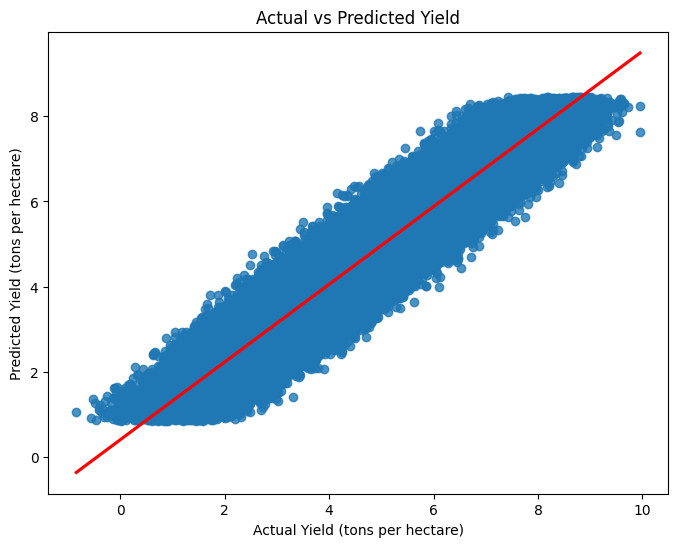

In [29]:
#regplot actual vs predicted

plt.figure(figsize=(8, 6))
sns.regplot(x=y_test, y=y_pred, line_kws={"color": "red"})
plt.xlabel('Actual Yield (tons per hectare)')
plt.ylabel('Predicted Yield (tons per hectare)')
plt.title('Actual vs Predicted Yield')
plt.show()  

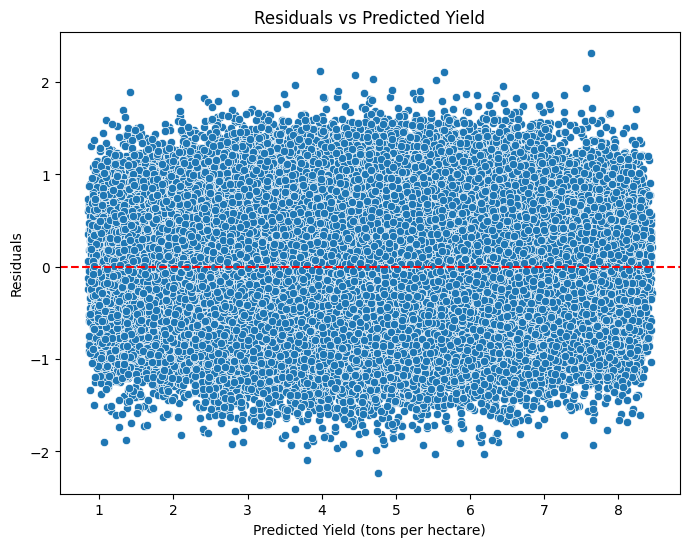

In [31]:
#residual plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Yield (tons per hectare)')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Yield')
plt.show()

In [32]:
# Save the model using pickle
import pickle

# Save the trained model
with open('crop_model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model saved as crop_model.pkl")


Model saved as crop_model.pkl


In [35]:
# Save the scaler using pickle
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Now train the model with scaled data
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Save the scaler
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

print("Scaler saved as scaler.pkl")


# Save the training columns for later use in the app
X_columns = X_train.columns  # columns used for training
with open('X_columns.pkl', 'wb') as f:
    pickle.dump(X_columns, f)

print("Model, scaler, and training columns saved successfully.")

Scaler saved as scaler.pkl
Model, scaler, and training columns saved successfully.
